In [23]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [24]:
sim = rebound.Simulation("sim_bins/juno.bin")
sim.particles[-1].m = 1.823e-27
sim.move_to_com()

In [25]:
date2 = "2012-02-02 13:00" #"2012-02-02 13:00" #Feb 1 2012 #180
date3 = "2012-09-01 13:00" #Aug 30 2012 #211
date4 = "2012-09-15 13:00" #Sep 14 2012 #15
date5 = "2013-10-10 13:00" #391
date6 = "2016-02-04 13:00" #Feb 3 2016 #846
date7 = "2016-07-01 13:00" #Jun 30 2016 #148


time12 = 180

time23= 211
time34= 15
time45= 390
time56= 845
time67= 148


dates = [date2, date3, date4, date5, date6, date7]
times = [time23, time34, time45, time56, time67]

In [26]:
def velocity_calc():
    vx = sim.particles[-1].vx *10
    vy = sim.particles[-1].vy *10
    vz = sim.particles[-1].vz *10
    vtot = math.sqrt((vx**2)+(vy**2)+(vz**2)) * 3
    return vtot

In [27]:
vdata = []
time_data = []

In [28]:
days = 0
for j in range(time12):
    sim.step()
    new_v = velocity_calc()
    vdata.append(new_v)
    days +=1
    time_data.append(days)
    
    

index1 = 5
for k in range(index1):
    chosen_date = dates[k]
    chosen_time = times[k] 
    
    print(chosen_date, chosen_time)


    sim.remove(index=9)
    sim.add("Juno",date=chosen_date)
    sim.particles[-1].m = 1.823e-27
    sim.dt = sim.particles[3].a/365.

    for i in range(chosen_time):
        sim.step()
        new_v = velocity_calc()
        vdata.append(new_v)
        days +=1
        time_data.append(days)

2012-02-02 13:00 211
Searching NASA Horizons for 'Juno'... Found: Juno (spacecraft) (-61).
2012-09-01 13:00 15
Searching NASA Horizons for 'Juno'... Found: Juno (spacecraft) (-61).
2012-09-15 13:00 390
Searching NASA Horizons for 'Juno'... Found: Juno (spacecraft) (-61).
2013-10-10 13:00 845
Searching NASA Horizons for 'Juno'... Found: Juno (spacecraft) (-61).
2016-02-04 13:00 148
Searching NASA Horizons for 'Juno'... Found: Juno (spacecraft) (-61).


Text(0, 0.5, 'Speed (km/s)')

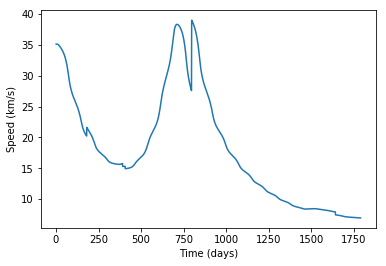

In [29]:
plt.plot(time_data, vdata)
plt.xlabel("Time (days)")
plt.ylabel("Speed (km/s)")

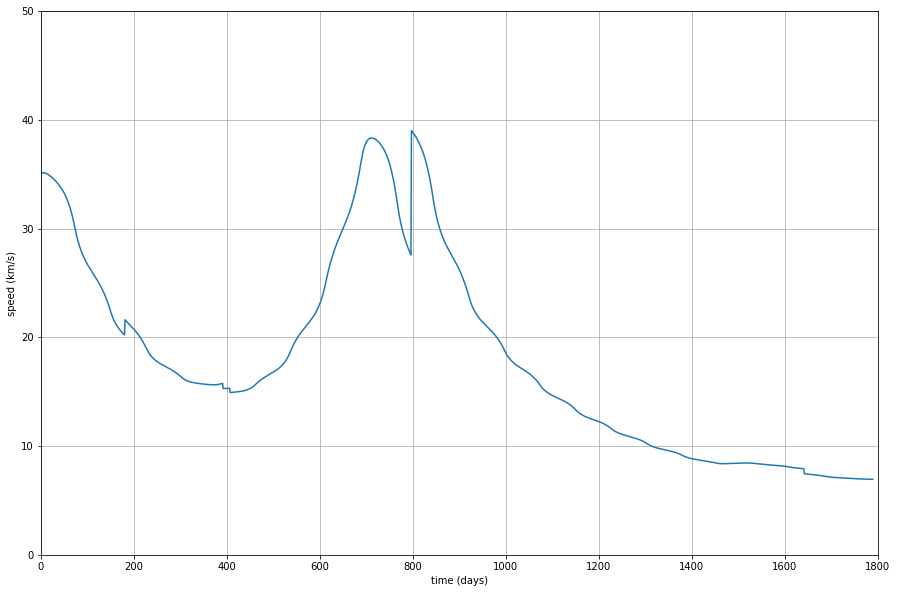

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time_data, vdata)

ax.set(xlabel='time (days)', ylabel='speed (km/s)')
ax.grid()
ax.set_xlim([0.,1800])
ax.set_ylim([0.,50.])
fig.savefig("jun_speed.png")
plt.show()